In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


#Import Thư Viện

In [2]:
#Import required libraries
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
import cv2
from math import sin, cos, pi

In [3]:
dir_train_csv = '/content/gdrive/MyDrive/Face Keypoints/Đồ án /facial-keypoints-detection/training/training.csv'
dir_test_csv = '/content/gdrive/MyDrive/Face Keypoints/Đồ án /facial-keypoints-detection/test/test.csv'

train_data = pd.read_csv(dir_train_csv)
test_data = pd.read_csv(dir_test_csv)

print("Length of train data:", len(train_data))
print("Length of train data:", len(test_data))


Length of train data: 7049
Length of train data: 1783


In [4]:
#Show sample training data 
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [5]:
# Now we deal with missing value
print("The number of missing values for each column:")
print(train_data.isnull().sum())

The number of missing values for each column:
left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mo

#Plot sample

In [6]:
def load_images(image_data):
    images = []
    for idx, sample in image_data.iterrows():
        image = np.array(sample['Image'].split(' '), dtype=int)
        image = np.reshape(image, (96,96,1))
        images.append(image)
    images = np.array(images)/255.
    return images
    

def load_keypoints(keypoint_data):
    keypoint_data = keypoint_data.drop('Image',axis = 1)
    keypoint_features = []
    for idx, sample_keypoints in keypoint_data.iterrows():
        keypoint_features.append(sample_keypoints)
    keypoint_features = np.array(keypoint_features, dtype = 'float')
    return keypoint_features


In [7]:
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='x', s=20)
    plt.title(title)

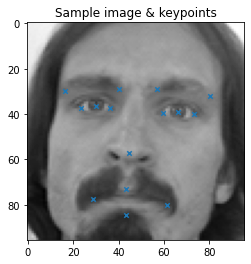

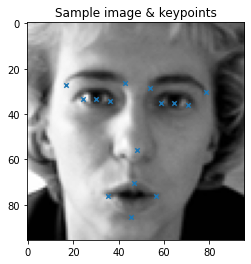

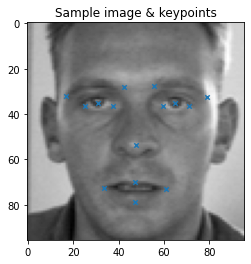

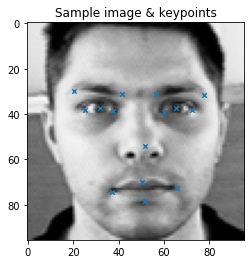

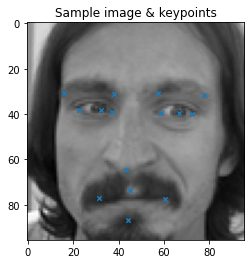

In [8]:
train_img = load_images(train_data)
train_keypoints = load_keypoints(train_data)
for i in range(5):
  fig, axis = plt.subplots()
  plot_sample(train_img[i], train_keypoints[i], axis, "Sample image & keypoints")

In [9]:
def data_loader(data_frame):  
    # Extract Images pixel values
    imgs = np.vstack(data_frame['Image'].values)/ 255.0
    imgs = imgs.astype(np.float32)    # Normalize, target values to (0, 1)
    imgs = imgs.reshape(-1, 96, 96, 1)
        
    # Extract labels (key point cords)
    labels = data_frame[data_frame.columns[:-1]].values
    labels = (labels - 48) / 48    # Normalize, traget cordinates to (-1, 1)
    labels = labels.astype(np.float32) 
    
    # shuffle the train data
#     imgs_array, labels_array = shuffle(imgs_array, labels_array, random_state=9)  
    
    return imgs, labels


#Prepare Data

In [10]:
train_data['Image'] = train_data['Image'].apply(lambda i: np.fromstring(i, sep=' '))
train_drop = train_data.dropna()
X_drop, y_drop = data_loader(train_drop)

print("Training datapoint shape: X_drop.shape:{}".format(X_drop.shape))
print("Training labels shape: y_drop.shape:{}".format(y_drop.shape))


train_fill = train_data.fillna(method = 'ffill')

X_fill, y_fill = data_loader(train_fill)

print("Training datapoint shape: X_drop.shape:{}".format(X_fill.shape))
print("Training labels shape: y_drop.shape:{}".format(y_fill.shape))



Training datapoint shape: X_drop.shape:(2140, 96, 96, 1)
Training labels shape: y_drop.shape:(2140, 30)
Training datapoint shape: X_drop.shape:(7049, 96, 96, 1)
Training labels shape: y_drop.shape:(7049, 30)


In [11]:
type(X_drop), type(y_drop)


(numpy.ndarray, numpy.ndarray)

In [12]:
type(X_fill), type(y_fill)

(numpy.ndarray, numpy.ndarray)

In [13]:
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='x', s=20)
    plt.title(title)

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Activation
from keras.layers import Flatten, Dense
from tensorflow.keras.layers import BatchNormalization
from keras import optimizers
from keras.callbacks import ModelCheckpoint, History
# from keras.optimizers import Adam

## Main model
def the_model():
    model = Sequential()
    
    model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(96, 96, 1))) # Input shape: (96, 96, 1)
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    # Convert all values to 1D array
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(30))
    
    return model




In [15]:
model = the_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

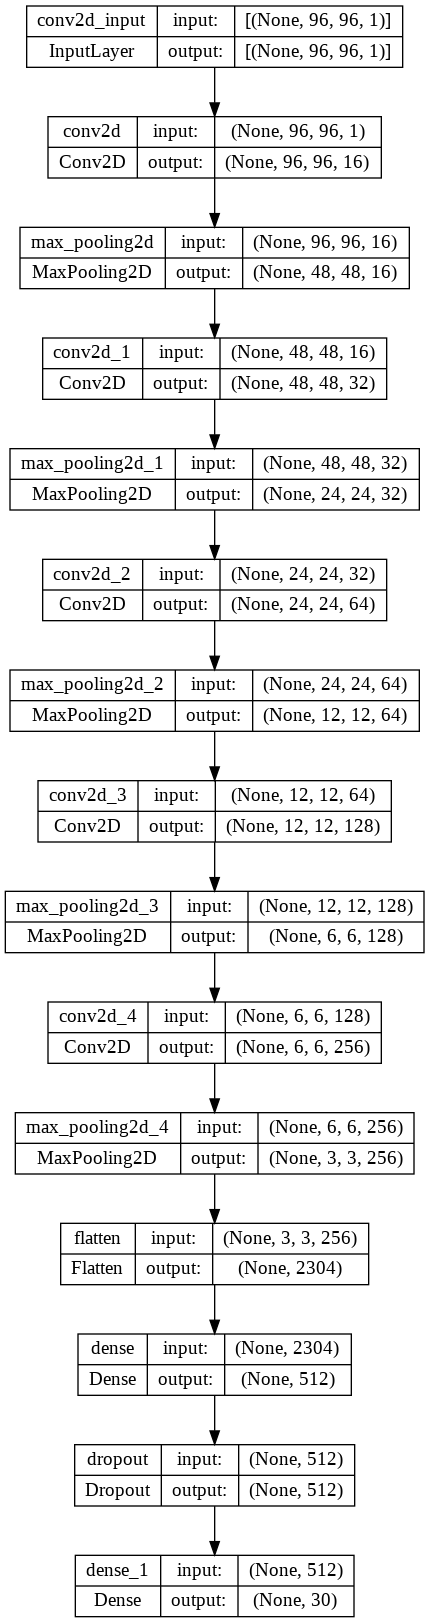

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [17]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 37.7 MB/s eta 0:00:00


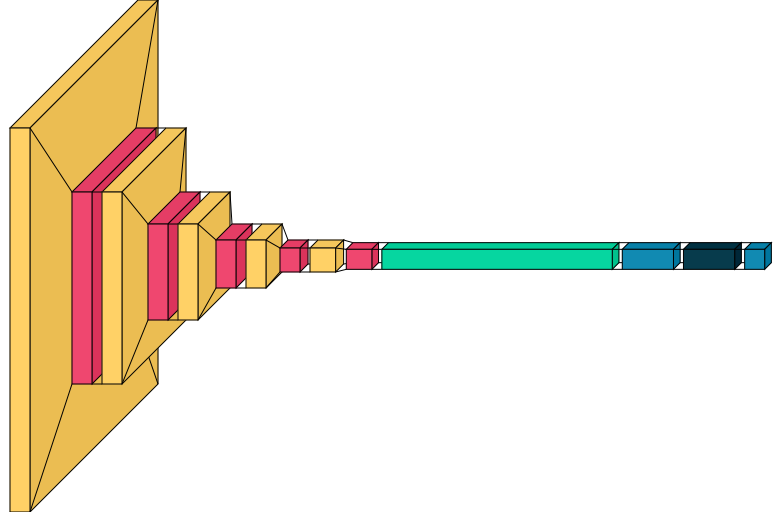

In [18]:
import visualkeras
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

visualkeras.layered_view(model)

In [19]:

epochs = 200
batch_size = 64

model = the_model()
hist = History()

checkpointer = ModelCheckpoint(filepath='checkpoint1.hdf5', 
                               verbose=1, save_best_only=True)

# Complie Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model_fit = model.fit(X_drop, y_drop,validation_split=0.15,epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist], verbose=1)
 
model.save('model1.h5')


Epoch 1/200
29/29 [==============================] - ETA: 0s - loss: 0.0497 - accuracy: 0.4332
Epoch 1: val_loss improved from inf to 0.01150, saving model to checkpoint1.hdf5
29/29 [==============================] - 9s 40ms/step - loss: 0.0497 - accuracy: 0.4332 - val_loss: 0.0115 - val_accuracy: 0.4174
Epoch 2/200
28/29 [===========================>..] - ETA: 0s - loss: 0.0102 - accuracy: 0.6239
Epoch 2: val_loss improved from 0.01150 to 0.00843, saving model to checkpoint1.hdf5
29/29 [==============================] - 1s 27ms/step - loss: 0.0102 - accuracy: 0.6229 - val_loss: 0.0084 - val_accuracy: 0.4174
Epoch 3/200
27/29 [==========================>...] - ETA: 0s - loss: 0.0074 - accuracy: 0.6372
Epoch 3: val_loss improved from 0.00843 to 0.00799, saving model to checkpoint1.hdf5
29/29 [==============================] - 1s 25ms/step - loss: 0.0074 - accuracy: 0.6377 - val_loss: 0.0080 - val_accuracy: 0.4174
Epoch 4/200
29/29 [==============================] - ETA: 0s - loss: 0.006

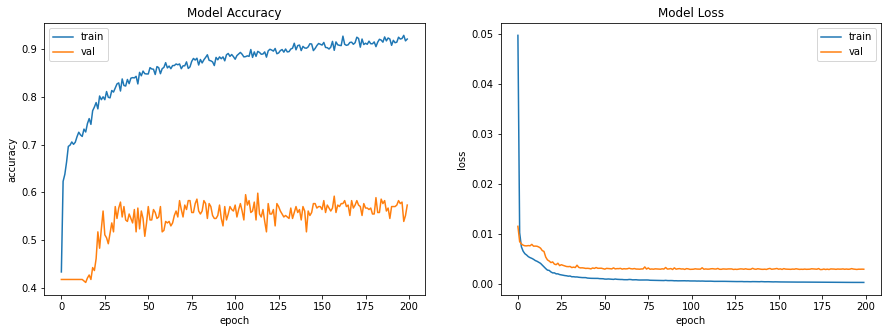

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(model_fit.history['accuracy'])
ax1.plot(model_fit.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set(xlabel='epoch', ylabel='accuracy')
ax1.legend(['train', 'val'])

ax2.plot(model_fit.history['loss'])
ax2.plot(model_fit.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(['train', 'val'])

In [21]:

epochs = 200
batch_size = 64

model = the_model()
hist = History()

checkpointer = ModelCheckpoint(filepath='checkpoint1.hdf5', 
                               verbose=1, save_best_only=True)

# Complie Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model_fit = model.fit(X_fill, y_fill,validation_split=0.15,epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist], verbose=1)

model.save('model2.h5')


Epoch 1/200
94/94 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.4537
Epoch 1: val_loss improved from inf to 0.00277, saving model to checkpoint1.hdf5
94/94 [==============================] - 3s 24ms/step - loss: 0.0111 - accuracy: 0.4537 - val_loss: 0.0028 - val_accuracy: 0.6654
Epoch 2/200
93/94 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.5457
Epoch 2: val_loss improved from 0.00277 to 0.00228, saving model to checkpoint1.hdf5
94/94 [==============================] - 2s 17ms/step - loss: 0.0054 - accuracy: 0.5457 - val_loss: 0.0023 - val_accuracy: 0.6626
Epoch 3/200
92/94 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.5975
Epoch 3: val_loss improved from 0.00228 to 0.00226, saving model to checkpoint1.hdf5
94/94 [==============================] - 2s 17ms/step - loss: 0.0049 - accuracy: 0.5972 - val_loss: 0.0023 - val_accuracy: 0.6626
Epoch 4/200
91/94 [============================>.] - ETA: 0s - loss: 0.004

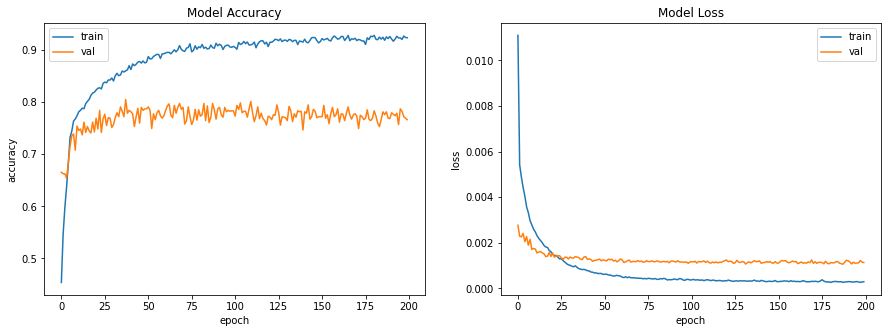

In [22]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(model_fit.history['accuracy'])
ax1.plot(model_fit.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set(xlabel='epoch', ylabel='accuracy')
ax1.legend(['train', 'val'])

ax2.plot(model_fit.history['loss'])
ax2.plot(model_fit.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(['train', 'val'])

In [1]:
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import time

# Load the saved model
from keras.models import load_model
model_1 = load_model('model1.h5')  # <-- Saved model path
model_2 = load_model('model2.h5')  # <-- Saved model path


def detect_points_1(face_img):
    me  = np.array(face_img)/255
    x_test = np.expand_dims(me, axis=0)
    x_test = np.expand_dims(x_test, axis=3)

    y_test = model_1.predict(x_test)
    label_points = (np.squeeze(y_test)*48)+48 
    
    return label_points


def detect_points_2(face_img):
    me  = np.array(face_img)/255
    x_test = np.expand_dims(me, axis=0)
    x_test = np.expand_dims(x_test, axis=3)

    y_test = model_2.predict(x_test)
    label_points = (np.squeeze(y_test)*48)+48
    
    return label_points

OSError: ignored

Shape of test_images: (1783, 96, 96, 1)
1/1 [==============================] - 0s 14ms/step


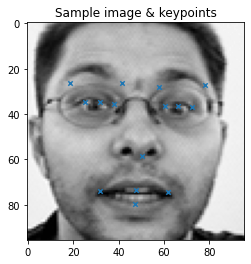

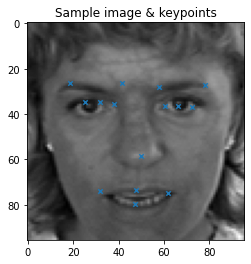

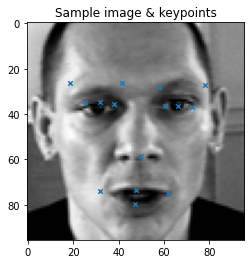

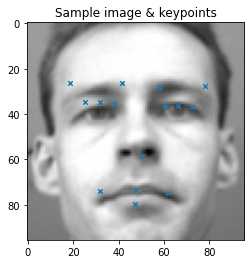

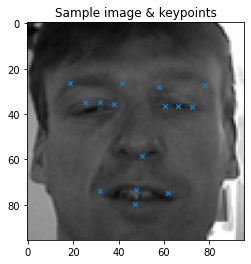

In [24]:
test_images = load_images(test_data)
print("Shape of test_images:", np.shape(test_images))
for i in range(5):
  fig, axis = plt.subplots()
  plot_sample(test_images[i], detect_points_1(test_images[i]), axis, "Sample image & keypoints")

In [ ]:
test_images = load_images(test_data)
print("Shape of test_images:", np.shape(test_images))
for i in range(5):
  fig, axis = plt.subplots()
  plot_sample(test_images[i], detect_points_2(test_images[i]), axis, "Sample image & keypoints")

In [25]:
# Load haarcascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
dimensions = (96, 96)

# Enter the path to your test image
img = cv2.imread('/content/gdrive/MyDrive/113B0296-F007-49F3-9814-280EDA3FD452.jpeg')

default_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") 
faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
# faces = face_cascade.detectMultiScale(gray_img, 4, 6)

faces_img = np.copy(gray_img)

plt.rcParams["axes.grid"] = False

In [26]:
if len(faces) == 0:
  print("Khong co khuon mat nao duoc phat hien")
else:
  print('Co khuon mat duoc phat hien')

Co khuon mat duoc phat hien


1/1 [==============================] - 0s 93ms/step


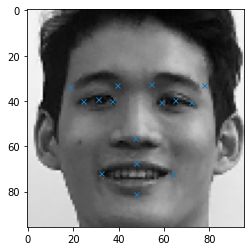

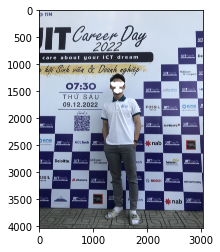

In [27]:
all_x_cords = []
all_y_cords = []

for i, (x,y,w,h) in enumerate(faces):
    
    h += 10
    w += 10
    x -= 5
    y -= 5
    
    just_face = cv2.resize(gray_img[y:y+h,x:x+w], dimensions)
    cv2.rectangle(faces_img,(x,y),(x+w,y+h),(255,0,0),1)
    
    scale_val_x = w/96
    scale_val_y = h/96
    
    label_point = detect_points_1(just_face)
    all_x_cords.append((label_point[::2]*scale_val_x)+x)
    all_y_cords.append((label_point[1::2]*scale_val_y)+y)
   
   
    plt.imshow(just_face, cmap='gray')
    plt.plot(label_point[::2], label_point[1::2], 'x', markersize=5)
    plt.show()
    
    
plt.imshow(default_img)    
plt.plot(all_x_cords, all_y_cords, 'wo',  markersize=3)
plt.show()



In [32]:
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timag.append(timg)

timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1) 
X_test = X_test/255.0
print(X_test.shape)

(1783, 96, 96, 1)


In [33]:
y_test = model.predict(X_test)
print(y_test.min(), y_test.max())

56/56 [==============================] - 1s 11ms/step
-0.8000887 0.95318294
